<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-MathmaticalMethods-DataScience/blob/main/2_4_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4 Maximum Likelihood Estimation

## 2.4.1 MLE for Random Samples

Maximum likelihood estimation (MLE) is an effective approach of estimating the parameters of a probability distribution through maximizing a likelihood function. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate. The logic of maximum likelihood is both intuitive and flexible. As a result, the method has become a dominant means of statistical inference


### Definition 2.4.1
Let $X_{1}, X_{2}, \ldots, X_{n}$ have joint $\mathrm{pmf}$ or pdf
$$
f\left(x_{1}, x_{2}, \ldots, x_{n} ; \theta_{1}, \ldots, \theta_{m}\right)
$$
where the parameters $\theta_{1}, \ldots, \theta_{m}$ have unknown values. When $x_{1}, \ldots, x_{n}$ are the observed sample values and (2.4.1) is regarded as a function of $\theta_{1}, \ldots, \theta_{m}$, it is called the likelihood function. The maximum likelihood estimates (mle's) $\hat{\theta}_{1}, \ldots, \hat{\theta}_{m}$ are those values of the $\theta_{i}$ 's that maximize the likelihood function, so that
$$
f\left(x_{1}, \ldots, x_{n} ; \hat{\theta}_{1}, \ldots, \hat{\theta}_{m}\right) \geq f\left(x_{1}, \ldots, x_{n} ; \theta_{1}, \ldots, \theta_{m}\right) \text { for all } \theta_{1}, \ldots, \theta_{m}
$$
When the $X_{i}$ 's are substituted in place of the $x_{i}$ 's, the maximum likelihood estimators result.

## 2.4.2 Linear Regression

Given input data points $\left\{\left(\mathbf{x}_{i}, y_{i}\right)\right\}_{i=1}^{n}$, we seek an affine function to fit the data and each $\mathbf{x}_{i}=\left(x_{i 1}, \ldots, x_{i p}\right)$. The common approach involves finding coefficients $\beta_{j}, j=1 \ldots, p$ 's that minimize the criterion
$$
\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
where
$$
\hat{y}_{i}=\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}
$$
Now we wish to discuss it from a probabilistic point of view by the maximum likelihood estimation. Consider that we have $n$ points, each of which is drawn in an independent and identically distributed (i.i.d.) way from the normal distribution. For a given, $\mu, \sigma^{2}$, the probability of those $n$ points being drawn define the likelihood function, which are just the multiplication of $n$ normal probability density functions (pdf) (because they are independent).
$$
\mathscr{P}(\mu \mid y)=\prod_{i=1}^{n} P_{Y}\left(y_{i} \mid \mu, \sigma^{2}\right)=\prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{\left(y_{i}-\mu\right)^{2}}{2 \sigma^{2}}}
$$
Now understand that $y$ is a random variable.
$$
y_{i}=\hat{y}_{i}+\varepsilon
$$
where $\varepsilon \sim N\left(0, \sigma^{2}\right)$. Thus, $y_{i}$ is a normal variable with mean as a linear function of $\mathbf{x}$ and a fixed standard deviation:
$$
y_{i} \sim N\left(\hat{y}_{i}, \sigma^{2}\right)
$$
As a result, for each $y_{i}$, we choose $\mu$ in the normal distributions in (2.4.2) as
$$
\mu_{i}=\hat{y}_{i}
$$
Hence we derive the maximum likelihood estimate
$$
\begin{aligned}
\hat{\beta}=\arg \max \mathscr{P}(\beta \mid y) &=\arg \max _{\beta} \prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}}} \\
&=\arg \max _{\beta} \log \left(\prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2 \pi}} e^{\left.-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}}\right)}\right.\\
&=\arg \max _{\beta} \sum_{i=1}^{n} \log \left(\frac{1}{\sigma \sqrt{2 \pi}}\right)+\log \left(e^{\left.-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}}\right)}\right.\\
&=\arg \max _{\beta} \sum_{i=1}^{n} \log \left(e^{\left.-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}}\right)}\right.\\
&=\arg \max _{\beta} \sum_{i=1}^{n}-\frac{\left(y_{i}-\hat{y}_{i}\right)^{2}}{2 \sigma^{2}} \\
&=\arg \min _{\beta} \sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
\end{aligned}
$$
which is exactly the least square problem we discussed before.

## Maximum Likelihood Estimation in Python 

Here, we perform simple linear regression on synthetic data. The data is ensured to be normally distributed by incorporating some random Gaussian noises. Data can be said to be normally distributed if its residual follows the normal distribution—Import the necessary libraries.

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize 

In [10]:
# generate an independent variable 
x = np.linspace(-10, 30, 100)
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head() 

,x,y
0,-10.000000,-14.899883
1,-9.595960,-22.827566
2,-9.191919,-15.686805
3,-8.787879,-22.069221
4,-8.383838,-6.485108


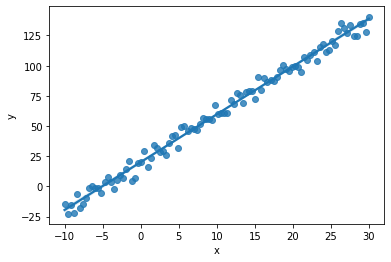

In [14]:
sns.regplot(x='x', y='y', data = df)
plt.show() 

The data is normally distributed, and the output variable is a continuously varying number. Hence, we can use the Ordinary Least Squares (OLS) method to determine the model parameters and use them as a benchmark to evaluate the Maximum Likelihood Estimation approach. Apply the OLS algorithm to the synthetic data and find the model parameters.

In [4]:
 features = api.add_constant(df.x)
 model = api.OLS(y, features).fit()
 model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6553.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           1.43e-91
Time:                        00:20:53   Log-Likelihood:                -315.28
No. Observations:                 100   AIC:                             634.6
Df Residuals:                      98   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6409      0.753     27.396      0.000      19.146      22.136
x              3.9700      0.049     80.952      0.000       3.873       4.067
==============================================================================
Omnibus:                        1.644   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.693
Skew:                          -0.268   Prob(JB):                        0.429
Kurtosis:                       2.655   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We get the intercept and regression coefficient values of the simple linear regression model. Further, we can derive the standard deviation of the normal distribution with the following codes.

In [5]:
res = model.resid
standard_dev = np.std(res)
standard_dev 

5.662206074008264

As we have solved the simple linear regression problem with an OLS model, it is time to solve the same problem by formulating it with Maximum Likelihood Estimation.

Define a user-defined Python function that can be iteratively called to determine the negative log-likelihood value. The key idea of formulating this function is that it must contain two elements: the first is the model building equation (here, the simple linear regression). The second is the logarithmic value of the probability density function (here, the log PDF of normal distribution). Since we need negative log-likelihood, it is obtained just by negating the log-likelihood.

In [6]:
# MLE function
# ml modeling and neg LL calculation
def MLE_Norm(parameters):
  # extract parameters
  const, beta, std_dev = parameters
  # predict the output
  pred = const + beta*x
  # Calculate the log-likelihood for normal distribution
  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
  # Calculate the negative log-likelihood
  neg_LL = -1*LL
  return neg_LL 

Minimize the negative log-likelihood of the generated data using the minimize method available with SciPy’s optimize module.

In [7]:
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model 

      fun: 315.2752115206695
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00000000e+00, -2.27373675e-05, -5.68434189e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 224
      nit: 29
   status: 0
  success: True
        x: array([20.6409492 ,  3.96998102,  5.66220544])

The MLE approach arrives at the final optimal solution after 35 iterations. The model’s parameters, the intercept, the regression coefficient and the standard deviation are well matching to those obtained using the OLS approach. 

[Source](https://analyticsindiamag.com/maximum-likelihood-estimation-python-guide/)